# View Calspec individual SED 

- Author Sylvie Dagoret-Campagne
- Creation : 25 june 2021


In [1]:
import os
import numpy as np

In [2]:
from astropy.table import Table
from astropy.io import fits

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline

In [4]:
import pysynphot as S

In [5]:
pysynphot_root_path=os.environ['PYSYN_CDBS']
path_sed_calspec=os.path.join(pysynphot_root_path,'calspec')

In [6]:
plt.rcParams["axes.labelsize"]="large"
plt.rcParams["axes.linewidth"]=2.0
plt.rcParams["xtick.major.size"]=8
plt.rcParams["ytick.major.size"]=8
plt.rcParams["ytick.minor.size"]=5
plt.rcParams["xtick.labelsize"]="large"
plt.rcParams["ytick.labelsize"]="large"

plt.rcParams["figure.figsize"]=(24,18)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
#plt.rcParams['axes.facecolor'] = 'blue'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
plt.rcParams['lines.markersize'] = 5  # markersize, in points
plt.rcParams['grid.alpha'] = 0.75 # transparency, between 0.0 and 1.0
plt.rcParams['grid.linestyle'] = '-' # simple line
plt.rcParams['grid.linewidth'] = 0.4 # in points
plt.rcParams['font.size'] = 13

# Read the Table

In [7]:
t=Table.read('table_summary_allcalspec.fits')
#t=Table.read('table_summary_calspec_hd.fits')  # view only HD type stars

In [8]:
t['magU'].format = "%3.3f" 
t['magB'].format = "%3.3f"  
t['magV'].format = "%3.3f"  
t['magR'].format = "%3.3f"  
t['magI'].format = "%3.3f"  

In [9]:
t.show_in_notebook()

idx,OBJNAME,RA,DEC,SP_TYPE,SP_QUAL,magU,magB,magV,magR,magI,FILES
0,10LAC,339.815,39.050,O9V,C,3.650,4.670,4.880,4.980,5.190,10lac_stis_004.fits
1,ALPHA_LYR,279.235,38.784,A0Va,C,0.030,0.030,0.030,0.070,0.100,alpha_lyr_stis_008.fits
2,FEIGE110,349.993,-5.166,sdO8VIIIHe5,B,10.360,11.450,11.500,11.970,12.145,feige110_stisnic_006.fits
3,FEIGE34,159.903,43.103,sdOp,D,9.613,10.910,11.140,11.319,11.464,feige34_stis_004.fits
4,FEIGE66,189.348,25.067,sdB1(k),C,9.117,10.260,10.590,10.642,10.809,feige66_002.fits
5,FEIGE67,190.466,17.522,sdOpec,D,10.261,11.700,11.630,11.969,12.159,feige67_002.fits
6,G191B2B,76.378,52.831,DA.8,C,10.250,11.440,11.690,11.930,12.108,g191b2b_stisnic_006.fits
7,G93-48,328.106,2.389,DA2.8,C,11.942,12.732,12.743,12.839,12.938,g93_48_004.fits
8,GD108,150.197,-7.559,sdB,D,12.406,13.349,13.563,13.662,13.781,gd108_005.fits
9,GD153,194.260,22.031,DA1.2,C,11.883,13.060,13.349,13.488,13.669,gd153_stisnic_006.fits


In [10]:
NBFILES=len(t)

In [11]:
dec=t["DEC"]

In [12]:
index_south_hemisphere=np.where(dec<0)[0]
index_south_hemisphere

array([ 2,  8, 10, 12, 13, 14, 16, 18, 21, 25, 26, 27, 30, 31, 32, 41, 42,
       43, 44])

In [13]:
# A flag to turn off plotting calspec
# In some cases the flag VISIBILITY may correspond to a flag saying if the star is visible
FLAG_VISIBILITY= np.array([False] * len(t))
FLAG_VISIBILITY[index_south_hemisphere]=True

In [14]:
FLAG_VISIBILITY

array([False, False,  True, False, False, False, False, False,  True,
       False,  True, False,  True,  True,  True, False,  True, False,
        True, False, False,  True, False, False, False,  True,  True,
        True, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
       False])

In [15]:
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBFILES)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NBFILES), alpha=1)

# Flux in linear scale

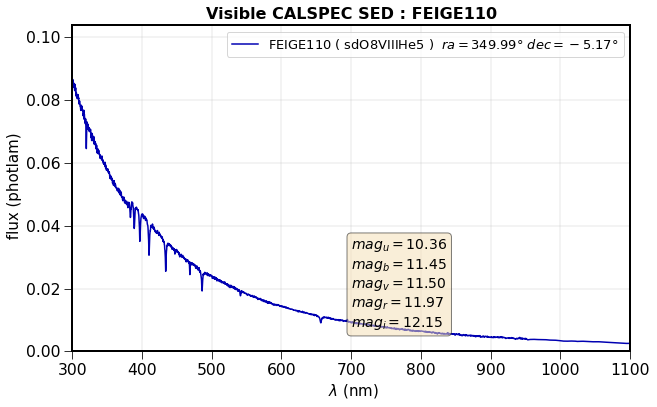

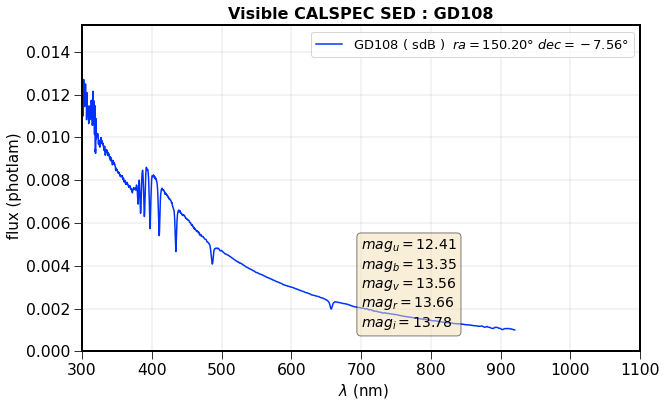

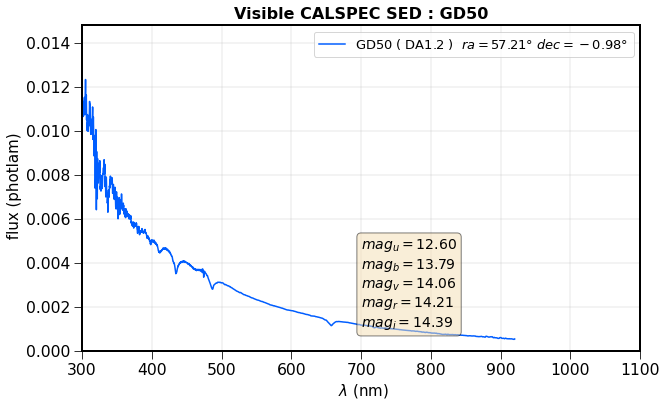

Warning, 9 of 3739 bins contained negative fluxes; they have been set to zero.


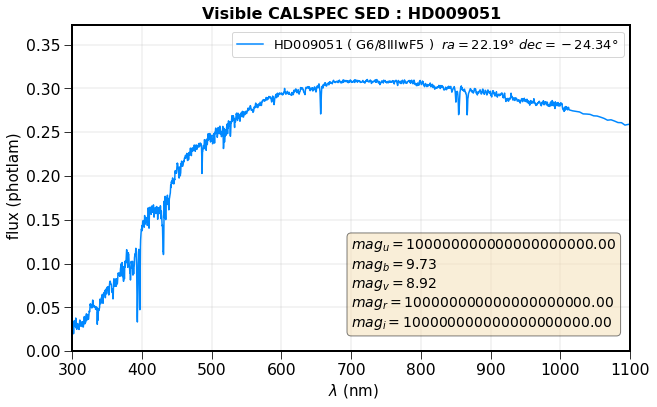

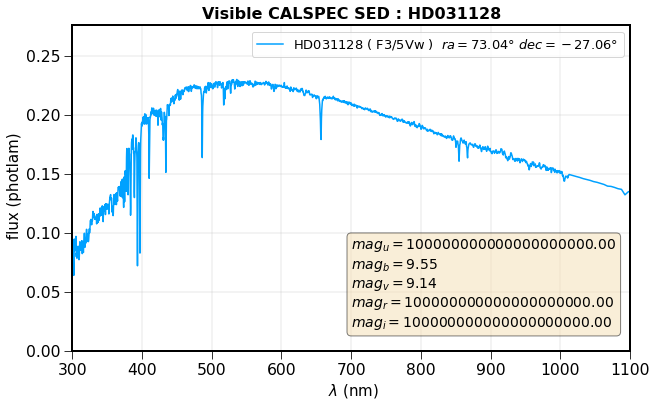

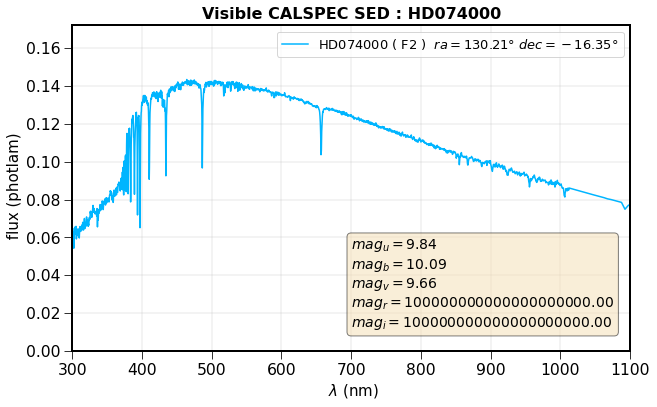

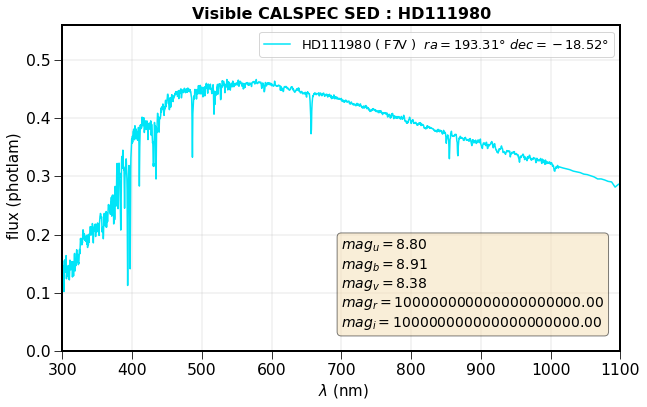

Warning, 22 of 7206 bins contained negative fluxes; they have been set to zero.


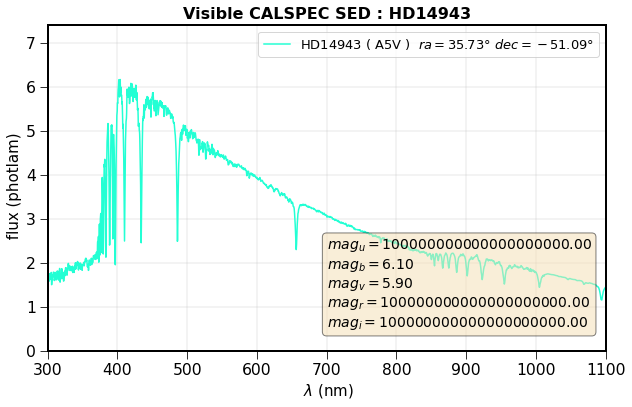

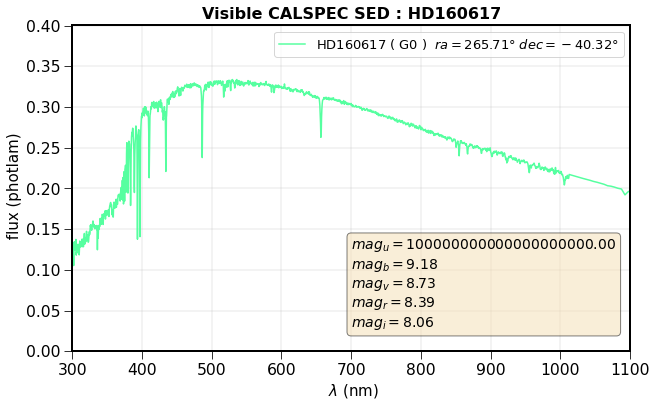

Warning, 16 of 3740 bins contained negative fluxes; they have been set to zero.


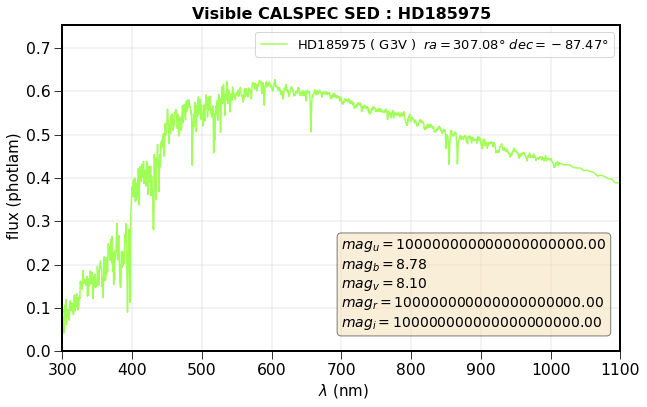

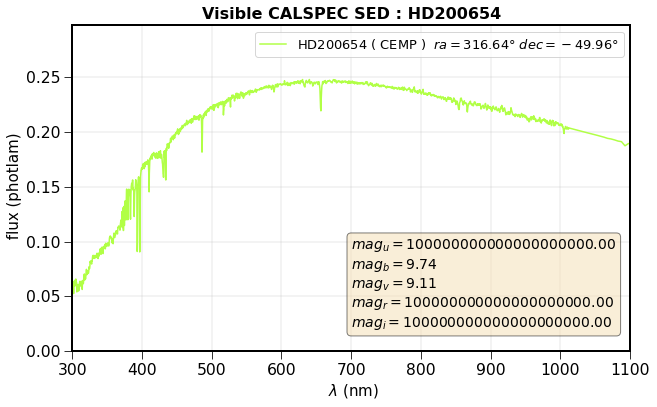

Warning, 6 of 6264 bins contained negative fluxes; they have been set to zero.


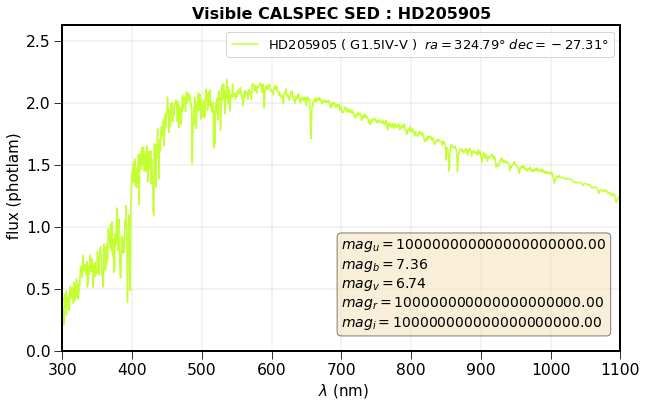

Warning, 13 of 6263 bins contained negative fluxes; they have been set to zero.


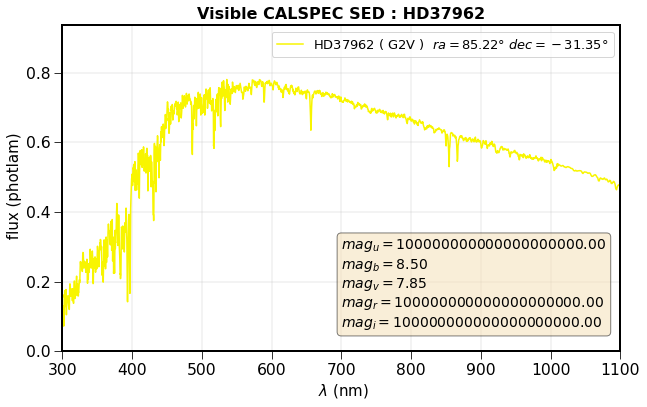

Warning, 1 of 6265 bins contained negative fluxes; they have been set to zero.


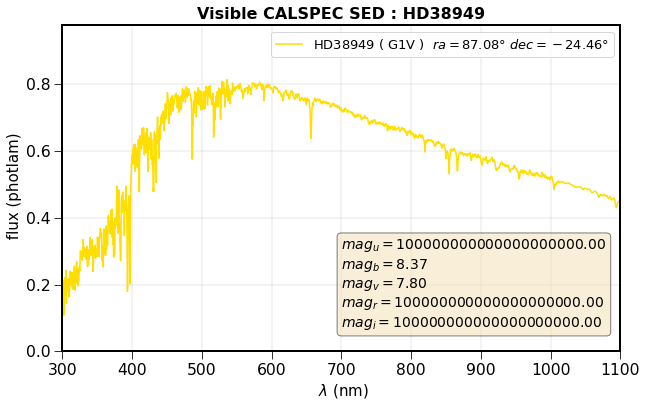

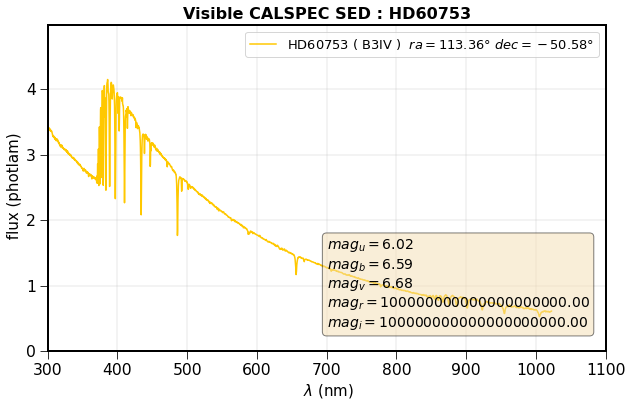

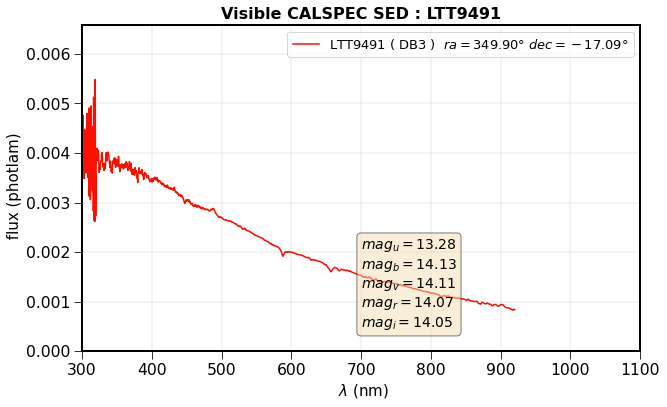

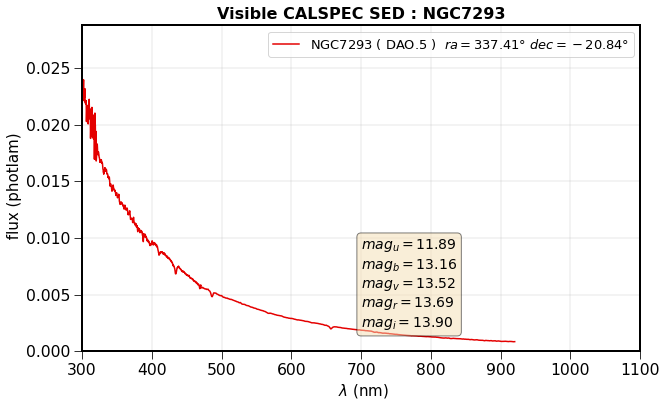

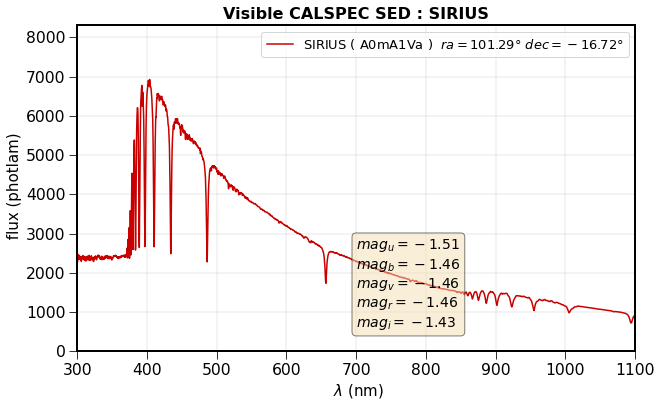

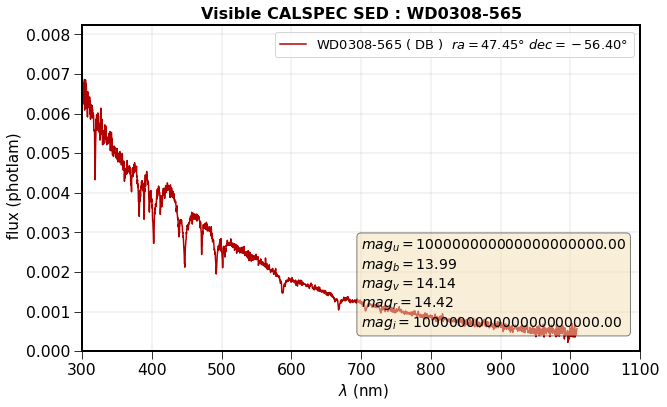

In [16]:
idx=0
for filename in t["FILES"]:
    
    if FLAG_VISIBILITY[idx]: 
        
        fig=plt.figure(figsize=(10,6))
        
        ax=fig.add_subplot(111)
        fullfilename=os.path.join(path_sed_calspec,filename)
        spec=S.FileSpectrum(fullfilename)
    
        spec.convert('photlam')
        spec.convert('nm')  
        
        
        label=t["OBJNAME"][idx]+" ( "+t["SP_TYPE"][idx]+" ) "+" $ra={:3.2f}°$".format(t["RA"][idx]) + " $dec={:3.2f}°$".format(t["DEC"][idx])
        ax.plot(spec.wave, spec.flux,color=all_colors[idx],label=label)
        
        textstr = '\n'.join((
        r'$mag_u=%2.2f$' % (t["magU"][idx], ),
        r'$mag_b=%2.2f$' % (t["magB"][idx], ),
        r'$mag_v=%2.2f$' % (t["magV"][idx], ),
        r'$mag_r=%2.2f$' % (t["magR"][idx], ),
        r'$mag_i=%2.2f$' % (t["magI"][idx], )))
        
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.5, 0.35, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
        
        idx_vis=np.where(np.logical_and(spec.wave>300,spec.wave<1100))[0]
        spec_max=spec.flux[idx_vis].max()
        spec_min=0
        
        
        
        ax.set_ylim(spec_min,spec_max*1.2)
    
    
        ax.set_xlim(300.,1100.)

        ax.legend()
        ax.grid()

        fign="all_viscalspec_spectra_lin.pdf"
        xlabel=' $\\lambda$ ({})'.format(spec.waveunits.name)
        ylabel=' flux ({})'.format(spec.fluxunits.name)
        ax.set_xlabel(xlabel,fontsize=15)
        ax.set_ylabel(ylabel,fontsize=15)
        ax.set_title("Visible CALSPEC SED : "+ t["OBJNAME"][idx])
        #plt.savefig(fign)
        plt.show()

    idx+=1